# Preprocessing Notebook

This notebook follows the correct order for data preprocessing and analysis.

## Structure:
1. **Load & Clean** - Imports, load data, drop columns, missing values
2. **EDA** - Distribution plots, stress counts, summary statistics
3. **Create Analysis DataFrames** - df_gpa and df_stress
4. **ANOVA** - One-way ANOVA and visualizations
5. **Outlier Detection** - Z-score and IQR methods
6. **Scaling** - StandardScaler on predictor sets
7. **Leverage & Influence Diagnostics** - Leverage, Cook's Distance, thresholds


# Section 1 — Load & Clean


In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')

print("All imports successful!")


All imports successful!


In [2]:
# Load dataset
df = pd.read_csv("data/student_lifestyle_dataset.csv")
print(f"Dataset shape: {df.shape}")
df.head()


Dataset shape: (2000, 8)


,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


In [3]:
# Drop irrelevant columns
df.drop("Student_ID", axis=1, inplace=True)
print(f"After dropping Student_ID: {df.shape}")
print(f"\nColumns: {list(df.columns)}")


After dropping Student_ID: (2000, 7)

Columns: ['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'GPA', 'Stress_Level']


In [4]:
# Missing value check
print("Missing values per column:")
print(df.isna().sum())
print(f"\nTotal missing values: {df.isna().sum().sum()}")
print(f"Percentage of missing data: {df.isna().sum().sum() / (df.shape[0] * df.shape[1]) * 100:.2f}%")


Missing values per column:
Study_Hours_Per_Day                0
Extracurricular_Hours_Per_Day      0
Sleep_Hours_Per_Day                0
Social_Hours_Per_Day               0
Physical_Activity_Hours_Per_Day    0
GPA                                0
Stress_Level                       0
dtype: int64

Total missing values: 0
Percentage of missing data: 0.00%


# Section 2 — EDA


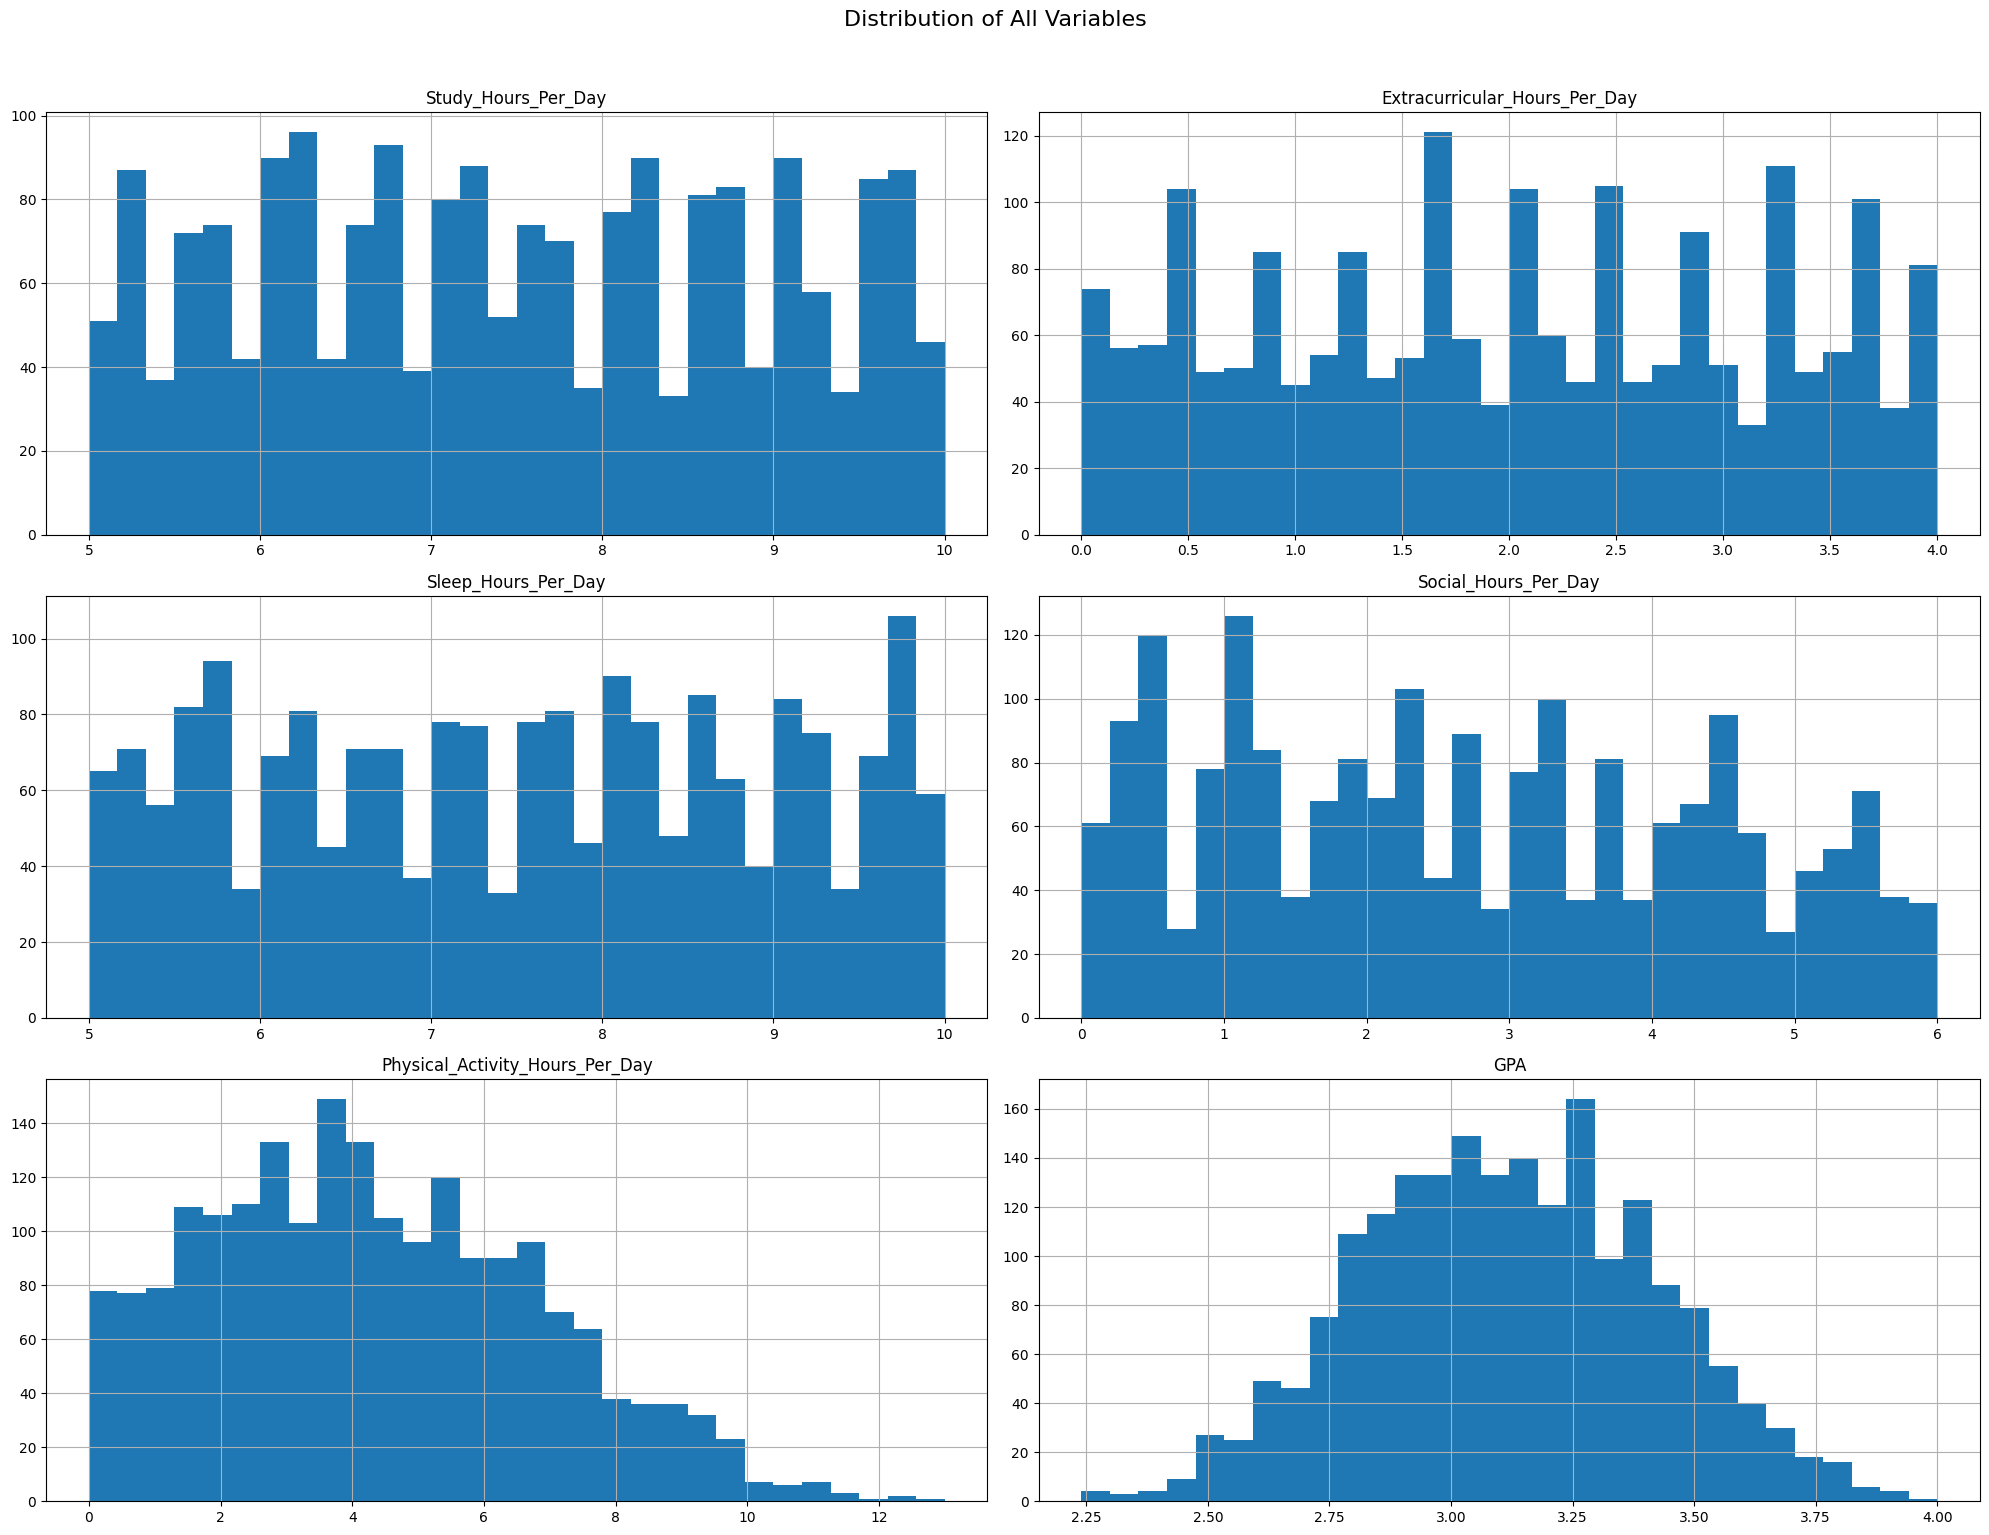

In [5]:
# Distribution plots
df.hist(bins=30, figsize=(20, 15))
plt.suptitle('Distribution of All Variables', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


Stress Level Distribution:
Stress_Level
High        1029
Moderate     674
Low          297
Name: count, dtype: int64

Stress Level Percentages:
Stress_Level
High        51.45
Moderate    33.70
Low         14.85
Name: proportion, dtype: float64


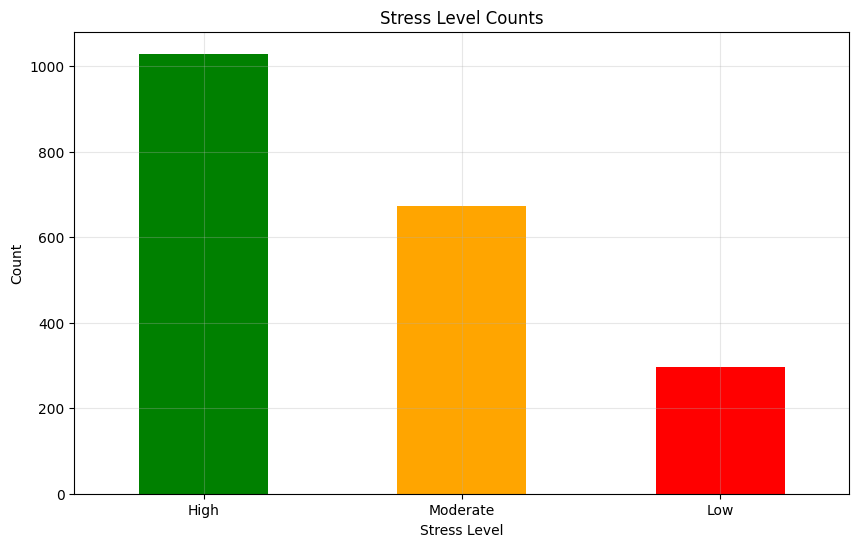

In [6]:
# Stress level counts
print("Stress Level Distribution:")
print(df['Stress_Level'].value_counts())
print("\nStress Level Percentages:")
print(df['Stress_Level'].value_counts(normalize=True) * 100)

# Visualize stress level counts
plt.figure(figsize=(10, 6))
df['Stress_Level'].value_counts().plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Stress Level Counts')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)
plt.show()


In [7]:
# Summary statistics
print("="*70)
print("SUMMARY STATISTICS")
print("="*70)
print(df.describe())
print("\n" + "="*70)
print("DATA TYPES AND INFO")
print("="*70)
print(df.info())


SUMMARY STATISTICS
       Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
count          2000.000000                    2000.000000   
mean              7.475800                       1.990100   
std               1.423888                       1.155855   
min               5.000000                       0.000000   
25%               6.300000                       1.000000   
50%               7.400000                       2.000000   
75%               8.700000                       3.000000   
max              10.000000                       4.000000   

       Sleep_Hours_Per_Day  Social_Hours_Per_Day  \
count          2000.000000           2000.000000   
mean              7.501250              2.704550   
std               1.460949              1.688514   
min               5.000000              0.000000   
25%               6.200000              1.200000   
50%               7.500000              2.600000   
75%               8.800000              4.100000   
max            

# Section 3 — Create Analysis DataFrames


In [8]:
# Create df_gpa: For GPA Prediction (Regression)
# Target: GPA (continuous)
# Predictors: All hour columns + one-hot encoded stress levels

df_gpa = df.copy()

# One-hot encode stress level for GPA prediction (stress is a predictor)
df_gpa = pd.get_dummies(df_gpa, columns=['Stress_Level'], prefix='Stress', drop_first=False)
df_gpa['Stress_Low'] = df_gpa['Stress_Low'].astype(int)
df_gpa['Stress_Moderate'] = df_gpa['Stress_Moderate'].astype(int)
df_gpa['Stress_High'] = df_gpa['Stress_High'].astype(int)

print("="*70)
print("DATAFRAME 1: GPA Prediction (Regression)")
print("="*70)
print(f"Target variable: GPA")
print(f"Predictor variables: {[col for col in df_gpa.columns if col != 'GPA']}")
print(f"Shape: {df_gpa.shape}")
print(f"\nColumns: {list(df_gpa.columns)}")
print(f"\nFirst few rows:")
df_gpa.head()


DATAFRAME 1: GPA Prediction (Regression)
Target variable: GPA
Predictor variables: ['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'Stress_High', 'Stress_Low', 'Stress_Moderate']
Shape: (2000, 9)

Columns: ['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'GPA', 'Stress_High', 'Stress_Low', 'Stress_Moderate']

First few rows:


,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_High,Stress_Low,Stress_Moderate
0,6.9,3.8,8.7,2.8,1.8,2.99,0,0,1
1,5.3,3.5,8.0,4.2,3.0,2.75,0,1,0
2,5.1,3.9,9.2,1.2,4.6,2.67,0,1,0
3,6.5,2.1,7.2,1.7,6.5,2.88,0,0,1
4,8.1,0.6,6.5,2.2,6.6,3.51,1,0,0


In [9]:
# Create df_stress: For Stress Level Classification (Multinomial Logistic)
# Target: Stress_Level (categorical)
# Predictors: All hour columns + GPA

df_stress = df.copy()

print("="*70)
print("DATAFRAME 2: Stress Level Classification (Multinomial Logistic)")
print("="*70)
print(f"Target variable: Stress_Level (categorical)")
print(f"Predictor variables: {[col for col in df_stress.columns if col != 'Stress_Level']}")
print(f"Shape: {df_stress.shape}")
print(f"\nColumns: {list(df_stress.columns)}")
print(f"\nStress Level distribution:")
print(df_stress['Stress_Level'].value_counts())
print(f"\nFirst few rows:")
df_stress.head()


DATAFRAME 2: Stress Level Classification (Multinomial Logistic)
Target variable: Stress_Level (categorical)
Predictor variables: ['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'GPA']
Shape: (2000, 7)

Columns: ['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'GPA', 'Stress_Level']

Stress Level distribution:
Stress_Level
High        1029
Moderate     674
Low          297
Name: count, dtype: int64

First few rows:


,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,8.1,0.6,6.5,2.2,6.6,3.51,High


# Section 4 — ANOVA


In [ ]:
# One-way ANOVA: GPA ~ Stress_Level
print("="*70)
print("ONE-WAY ANOVA: Does Stress_Level affect GPA?")
print("="*70)

# Prepare data for ANOVA (use original data with Stress_Level as categorical)
df_anova = df.copy()

# Group GPA by Stress_Level
stress_groups = [df_anova[df_anova['Stress_Level'] == level]['GPA'].values 
                 for level in df_anova['Stress_Level'].unique()]

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(*stress_groups)

print(f"\nOne-way ANOVA Results:")
print(f"  F-statistic: {f_statistic:.4f}")
print(f"  p-value: {p_value:.6f}")

# Interpret results
alpha = 0.05
if p_value < alpha:
    print(f"\nSignificant effect (p < {alpha}): Stress_Level DOES affect GPA")
    print("So, Stress_Level should be included as a predictor in GPA regression model")
else:
    print(f"\nNo significant effect (p >= {alpha}): Stress_Level may not affect GPA")

# Show group means and standard deviations
print("\n" + "="*70)
print("Group Statistics (GPA by Stress_Level):")
print("="*70)
for level in sorted(df_anova['Stress_Level'].unique()):
    group_data = df_anova[df_anova['Stress_Level'] == level]['GPA']
    print(f"\n{level}:")
    print(f"  Mean GPA: {group_data.mean():.3f}")
    print(f"  Std GPA: {group_data.std():.3f}")
    print(f"  Count: {len(group_data)}")


ONE-WAY ANOVA: Does Stress_Level affect GPA?

One-way ANOVA Results:
  F-statistic: 434.8882
  p-value: 0.000000

✓ Significant effect (p < 0.05): Stress_Level DOES affect GPA
  → Stress_Level should be included as a predictor in GPA regression model

Group Statistics (GPA by Stress_Level):

High:
  Mean GPA: 3.262
  Std GPA: 0.275
  Count: 1029

Low:
  Mean GPA: 2.817
  Std GPA: 0.215
  Count: 297

Moderate:
  Mean GPA: 3.025
  Std GPA: 0.221
  Count: 674


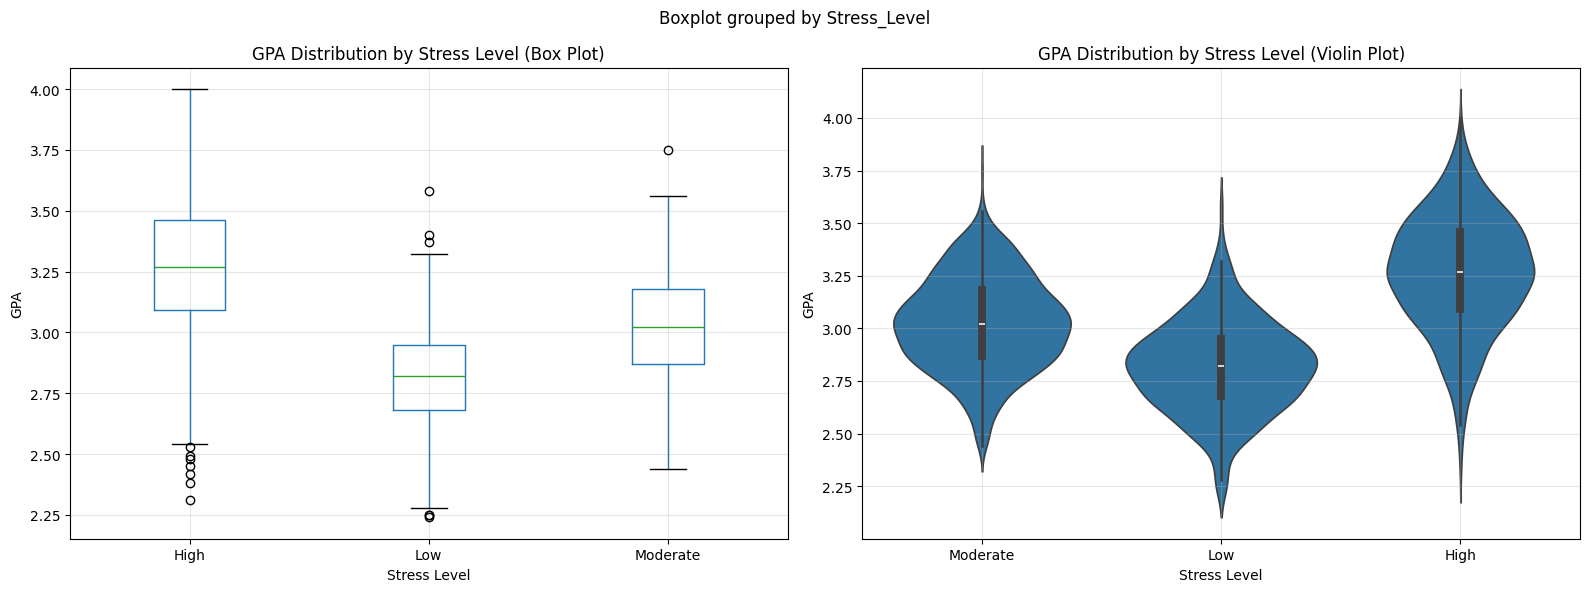

In [11]:
# Boxplots/violin plots for GPA vs Stress_Level
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Box plot
df_anova.boxplot(column='GPA', by='Stress_Level', ax=axes[0])
axes[0].set_title('GPA Distribution by Stress Level (Box Plot)')
axes[0].set_xlabel('Stress Level')
axes[0].set_ylabel('GPA')
axes[0].grid(True, alpha=0.3)

# Violin plot
sns.violinplot(data=df_anova, x='Stress_Level', y='GPA', ax=axes[1])
axes[1].set_title('GPA Distribution by Stress Level (Violin Plot)')
axes[1].set_xlabel('Stress Level')
axes[1].set_ylabel('GPA')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# Section 5 — Outlier Detection


In [12]:
# Z-score/IQR outliers for GPA predictors
print("="*70)
print("OUTLIER ANALYSIS: GPA Prediction Model")
print("="*70)
print("Target: GPA")
print("Predictors: All hour columns + one-hot encoded stress levels")
print("\nNote: Outlier detection on PREDICTORS only (excluding GPA target)")
print("Note: Excluding one-hot encoded stress columns (binary, not continuous)")

# Define predictors for GPA model (exclude target and binary columns)
gpa_predictors = [col for col in df_gpa.columns if col != 'GPA' and col not in ['Stress_High', 'Stress_Low', 'Stress_Moderate']]

df_gpa_features = df_gpa[gpa_predictors]

print(f"\nPredictor columns for outlier analysis: {gpa_predictors}")

# Z-score method
z_scores_gpa = zscore(df_gpa_features)
outliers_z_gpa = (z_scores_gpa > 3) | (z_scores_gpa < -3)
df_outliers_z_gpa = df_gpa[outliers_z_gpa.any(axis=1)]

# IQR method
Q1_gpa = df_gpa_features.quantile(0.25)
Q3_gpa = df_gpa_features.quantile(0.75)
IQR_gpa = Q3_gpa - Q1_gpa
outliers_iqr_gpa = (df_gpa_features < (Q1_gpa - 1.5 * IQR_gpa)) | (df_gpa_features > (Q3_gpa + 1.5 * IQR_gpa))
df_outliers_iqr_gpa = df_gpa[outliers_iqr_gpa.any(axis=1)]

print(f"\n=== Z-Score Method (|z| > 3) ===")
print(f"Number of outlier rows: {len(df_outliers_z_gpa)}")
print(f"Percentage: {len(df_outliers_z_gpa)/len(df_gpa)*100:.2f}%")

print(f"\n=== IQR Method ===")
print(f"Number of outlier rows: {len(df_outliers_iqr_gpa)}")
print(f"Percentage: {len(df_outliers_iqr_gpa)/len(df_gpa)*100:.2f}%")


OUTLIER ANALYSIS: GPA Prediction Model
Target: GPA
Predictors: All hour columns + one-hot encoded stress levels

Note: Outlier detection on PREDICTORS only (excluding GPA target)
Note: Excluding one-hot encoded stress columns (binary, not continuous)

Predictor columns for outlier analysis: ['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day']

=== Z-Score Method (|z| > 3) ===
Number of outlier rows: 4
Percentage: 0.20%

=== IQR Method ===
Number of outlier rows: 5
Percentage: 0.25%


In [13]:
# Z-score/IQR outliers for Stress predictors
print("="*70)
print("OUTLIER ANALYSIS: Stress Classification Model")
print("="*70)
print("Target: Stress_Level (categorical)")
print("Predictors: All hour columns + GPA")
print("\nNote: Outlier detection on PREDICTORS only (excluding Stress_Level target)")

# Define predictors for stress model (exclude categorical target)
stress_predictors = [col for col in df_stress.columns if col != 'Stress_Level']
df_stress_features = df_stress[stress_predictors]

print(f"\nPredictor columns for outlier analysis: {stress_predictors}")

# Z-score method
z_scores_stress = zscore(df_stress_features)
outliers_z_stress = (z_scores_stress > 3) | (z_scores_stress < -3)
df_outliers_z_stress = df_stress[outliers_z_stress.any(axis=1)]

# IQR method
Q1_stress = df_stress_features.quantile(0.25)
Q3_stress = df_stress_features.quantile(0.75)
IQR_stress = Q3_stress - Q1_stress
outliers_iqr_stress = (df_stress_features < (Q1_stress - 1.5 * IQR_stress)) | (df_stress_features > (Q3_stress + 1.5 * IQR_stress))
df_outliers_iqr_stress = df_stress[outliers_iqr_stress.any(axis=1)]

print(f"\n=== Z-Score Method (|z| > 3) ===")
print(f"Number of outlier rows: {len(df_outliers_z_stress)}")
print(f"Percentage: {len(df_outliers_z_stress)/len(df_stress)*100:.2f}%")

print(f"\n=== IQR Method ===")
print(f"Number of outlier rows: {len(df_outliers_iqr_stress)}")
print(f"Percentage: {len(df_outliers_iqr_stress)/len(df_stress)*100:.2f}%")


OUTLIER ANALYSIS: Stress Classification Model
Target: Stress_Level (categorical)
Predictors: All hour columns + GPA

Note: Outlier detection on PREDICTORS only (excluding Stress_Level target)

Predictor columns for outlier analysis: ['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'GPA']

=== Z-Score Method (|z| > 3) ===
Number of outlier rows: 4
Percentage: 0.20%

=== IQR Method ===
Number of outlier rows: 9
Percentage: 0.45%


In [14]:
# Summary counts
print("="*70)
print("SUMMARY: Outlier Analysis Results")
print("="*70)

print("\n" + "="*70)
print("GPA PREDICTION MODEL")
print("="*70)
print(f"Outliers (Z-score): {len(df_outliers_z_gpa)} ({len(df_outliers_z_gpa)/len(df_gpa)*100:.2f}%)")
print(f"Outliers (IQR): {len(df_outliers_iqr_gpa)} ({len(df_outliers_iqr_gpa)/len(df_gpa)*100:.2f}%)")

print("\n" + "="*70)
print("STRESS CLASSIFICATION MODEL")
print("="*70)
print(f"Outliers (Z-score): {len(df_outliers_z_stress)} ({len(df_outliers_z_stress)/len(df_stress)*100:.2f}%)")
print(f"Outliers (IQR): {len(df_outliers_iqr_stress)} ({len(df_outliers_iqr_stress)/len(df_stress)*100:.2f}%)")


SUMMARY: Outlier Analysis Results

GPA PREDICTION MODEL
Outliers (Z-score): 4 (0.20%)
Outliers (IQR): 5 (0.25%)

STRESS CLASSIFICATION MODEL
Outliers (Z-score): 4 (0.20%)
Outliers (IQR): 9 (0.45%)


# Section 6 — Scaling


In [15]:
# StandardScaler() on predictor sets

# Prepare predictor sets (continuous features only, excluding binary/categorical)
X_gpa_for_scaling = df_gpa[gpa_predictors].copy()
X_stress_for_scaling = df_stress[stress_predictors].copy()

# Create scalers for each model
scaler_gpa = StandardScaler()
scaler_stress = StandardScaler()

# Fit scalers on training data
scaler_gpa.fit(X_gpa_for_scaling)
scaler_stress.fit(X_stress_for_scaling)

# Transform the data
X_gpa_scaled = scaler_gpa.transform(X_gpa_for_scaling)
X_stress_scaled = scaler_stress.transform(X_stress_for_scaling)

# Convert back to DataFrames for easier handling
X_gpa_scaled_df = pd.DataFrame(X_gpa_scaled, columns=gpa_predictors, index=X_gpa_for_scaling.index)
X_stress_scaled_df = pd.DataFrame(X_stress_scaled, columns=stress_predictors, index=X_stress_for_scaling.index)

print("Scaling complete!")
print(f"GPA scaled shape: {X_gpa_scaled_df.shape}")
print(f"Stress scaled shape: {X_stress_scaled_df.shape}")


Scaling complete!
GPA scaled shape: (2000, 5)
Stress scaled shape: (2000, 6)


In [16]:
# Describe scaled features
print("="*70)
print("FEATURE SCALES: After Standardization (Mean=0, Std=1)")
print("="*70)

print("\n--- GPA Model Predictors (Scaled) ---")
print(X_gpa_scaled_df.describe())

print("\n--- Stress Model Predictors (Scaled) ---")
print(X_stress_scaled_df.describe())

print("\n--- Verification ---")
print(f"GPA Model - Scaled feature statistics:")
for col in gpa_predictors:
    mean_val = X_gpa_scaled_df[col].mean()
    std_val = X_gpa_scaled_df[col].std()
    print(f"  {col}: Mean={mean_val:.6f}, Std={std_val:.6f}")

print(f"\nStress Model - Scaled feature statistics:")
for col in stress_predictors:
    mean_val = X_stress_scaled_df[col].mean()
    std_val = X_stress_scaled_df[col].std()
    print(f"  {col}: Mean={mean_val:.6f}, Std={std_val:.6f}")


FEATURE SCALES: After Standardization (Mean=0, Std=1)

--- GPA Model Predictors (Scaled) ---
       Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
count         2.000000e+03                   2.000000e+03   
mean         -3.153033e-16                   1.421085e-17   
std           1.000250e+00                   1.000250e+00   
min          -1.739195e+00                  -1.722187e+00   
25%          -8.259735e-01                  -8.568098e-01   
50%          -5.324782e-02                   8.567233e-03   
75%           8.599734e-01                   8.739443e-01   
max           1.773195e+00                   1.739321e+00   

       Sleep_Hours_Per_Day  Social_Hours_Per_Day  \
count         2.000000e+03          2.000000e+03   
mean          1.776357e-16         -1.403322e-16   
std           1.000250e+00          1.000250e+00   
min          -1.712501e+00         -1.602134e+00   
25%          -8.909112e-01         -8.912726e-01   
50%          -8.558225e-04         -6.193383e

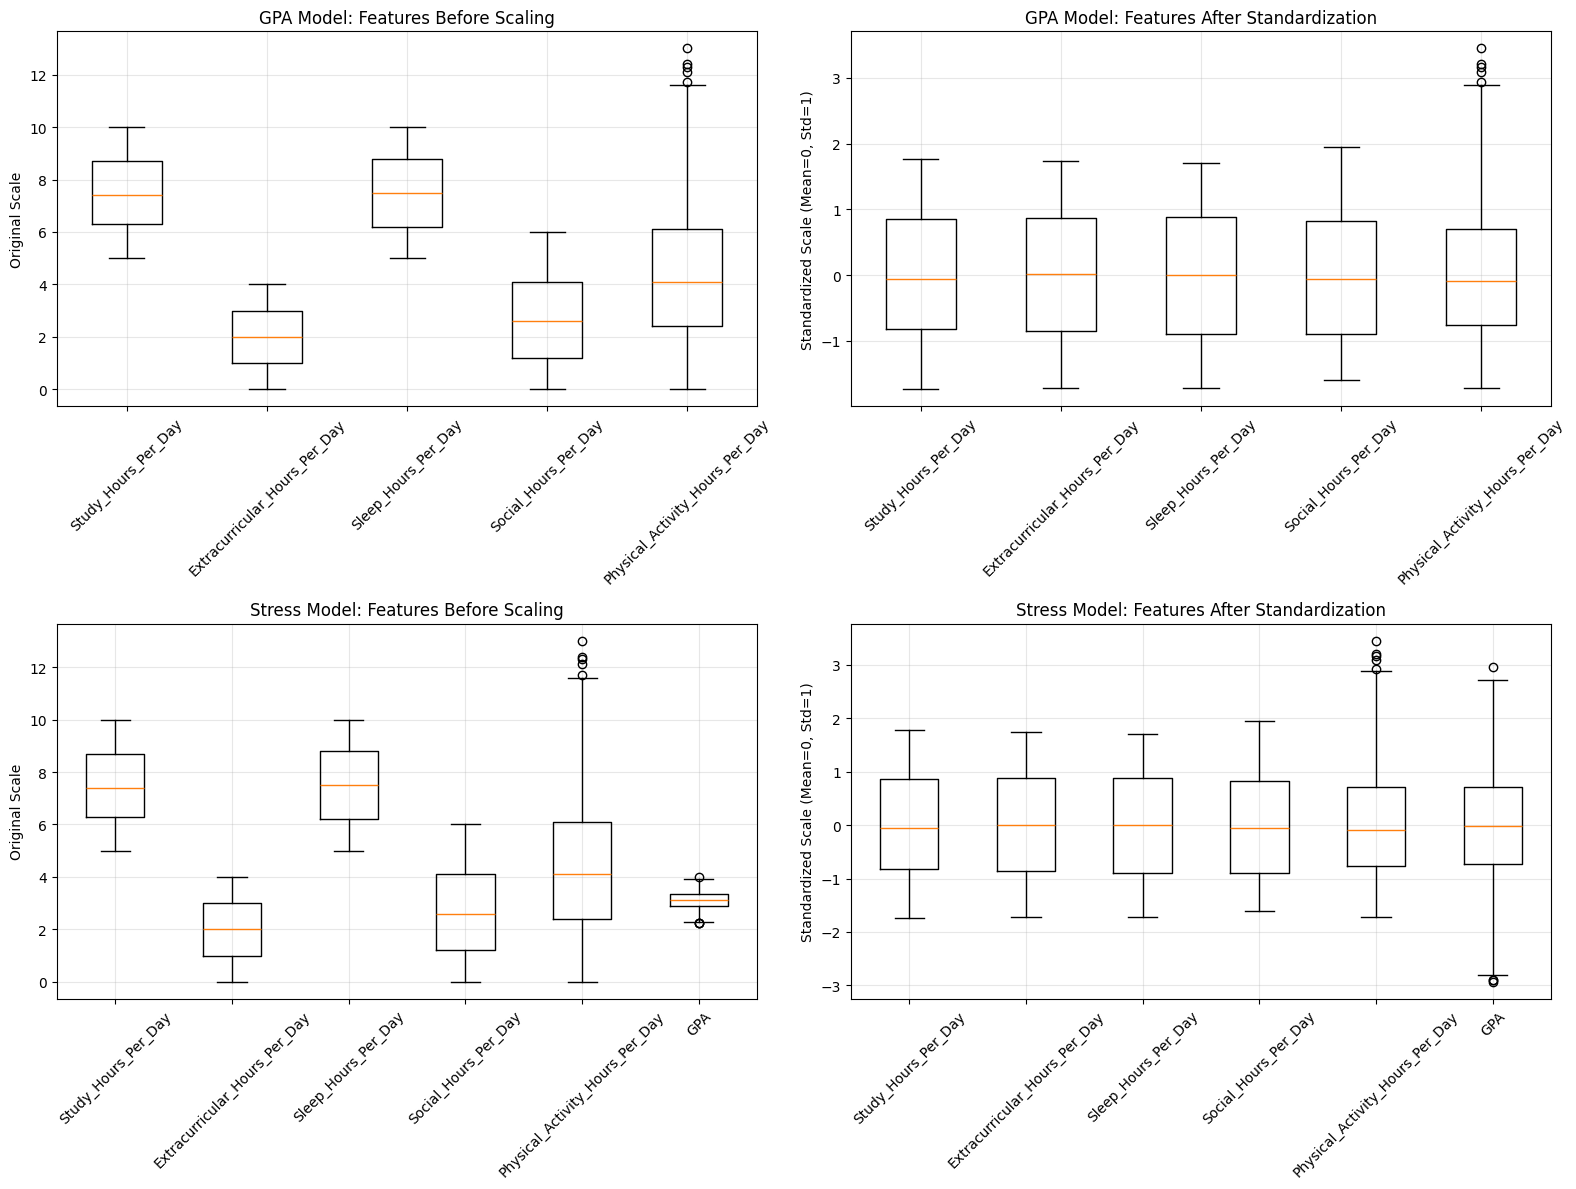


Note: After standardization, all features have similar scales, making:
  - Coefficients more comparable
  - Optimization more stable
  - Regularization effects more balanced


In [17]:
# Before vs after scaling plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# GPA Model - Before scaling
axes[0, 0].boxplot([df_gpa[col] for col in gpa_predictors], labels=gpa_predictors)
axes[0, 0].set_title('GPA Model: Features Before Scaling')
axes[0, 0].set_ylabel('Original Scale')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)

# GPA Model - After scaling
axes[0, 1].boxplot([X_gpa_scaled_df[col] for col in gpa_predictors], labels=gpa_predictors)
axes[0, 1].set_title('GPA Model: Features After Standardization')
axes[0, 1].set_ylabel('Standardized Scale (Mean=0, Std=1)')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# Stress Model - Before scaling
axes[1, 0].boxplot([df_stress[col] for col in stress_predictors], labels=stress_predictors)
axes[1, 0].set_title('Stress Model: Features Before Scaling')
axes[1, 0].set_ylabel('Original Scale')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3)

# Stress Model - After scaling
axes[1, 1].boxplot([X_stress_scaled_df[col] for col in stress_predictors], labels=stress_predictors)
axes[1, 1].set_title('Stress Model: Features After Standardization')
axes[1, 1].set_ylabel('Standardized Scale (Mean=0, Std=1)')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nNote: After standardization, all features have similar scales, making:")
print("  - Coefficients more comparable")
print("  - Optimization more stable")
print("  - Regularization effects more balanced")


# Section 7 — Leverage & Influence Diagnostics


In [18]:
# Build design matrices (scaled)

# For GPA model: include one-hot encoded stress (drop one to avoid multicollinearity)
X_gpa_design = X_gpa_scaled_df.copy()
# Add one-hot encoded stress levels (drop Stress_Low as reference)
X_gpa_design['Stress_High'] = df_gpa['Stress_High'].values
X_gpa_design['Stress_Moderate'] = df_gpa['Stress_Moderate'].values

# For Stress model: use all scaled predictors
X_stress_design = X_stress_scaled_df.copy()

print("Design matrices created:")
print(f"GPA design matrix shape: {X_gpa_design.shape}")
print(f"Stress design matrix shape: {X_stress_design.shape}")


Design matrices created:
GPA design matrix shape: (2000, 7)
Stress design matrix shape: (2000, 6)


In [19]:
# Compute leverage (using scaled features)

# GPA Model Leverage
X_gpa_const = np.column_stack([np.ones(len(X_gpa_design)), X_gpa_design.values])
p_gpa = X_gpa_const.shape[1]  # number of parameters
n_gpa = X_gpa_const.shape[0]  # number of observations

XtX_gpa = X_gpa_const.T.dot(X_gpa_const)
try:
    XtX_inv_gpa = np.linalg.inv(XtX_gpa)
except np.linalg.LinAlgError:
    XtX_inv_gpa = np.linalg.pinv(XtX_gpa)

hat_diag_gpa = np.sum(X_gpa_const.dot(XtX_inv_gpa) * X_gpa_const, axis=1)

# Stress Model Leverage
X_stress_const = np.column_stack([np.ones(len(X_stress_design)), X_stress_design.values])
p_stress = X_stress_const.shape[1]  # number of parameters
n_stress = X_stress_const.shape[0]  # number of observations

XtX_stress = X_stress_const.T.dot(X_stress_const)
try:
    XtX_inv_stress = np.linalg.inv(XtX_stress)
except np.linalg.LinAlgError:
    XtX_inv_stress = np.linalg.pinv(XtX_stress)

hat_diag_stress = np.sum(X_stress_const.dot(XtX_inv_stress) * X_stress_const, axis=1)

# Store leverage values
df_gpa['Leverage'] = hat_diag_gpa
df_stress['Leverage'] = hat_diag_stress

print("Leverage computed for both models")


Leverage computed for both models


In [20]:
# Compute thresholds (2p/n, 3p/n)

# GPA Model thresholds
threshold_2p_gpa = 2 * p_gpa / n_gpa
threshold_3p_gpa = 3 * p_gpa / n_gpa

# Stress Model thresholds
threshold_2p_stress = 2 * p_stress / n_stress
threshold_3p_stress = 3 * p_stress / n_stress

print("="*70)
print("LEVERAGE THRESHOLDS")
print("="*70)
print(f"\nGPA Model:")
print(f"  Number of predictors (including intercept): {p_gpa}")
print(f"  Number of observations: {n_gpa}")
print(f"  2p/n = {threshold_2p_gpa:.6f}")
print(f"  3p/n = {threshold_3p_gpa:.6f}")

print(f"\nStress Model:")
print(f"  Number of predictors (including intercept): {p_stress}")
print(f"  Number of observations: {n_stress}")
print(f"  2p/n = {threshold_2p_stress:.6f}")
print(f"  3p/n = {threshold_3p_stress:.6f}")

# Count high leverage points
high_lev_2p_gpa = (hat_diag_gpa > threshold_2p_gpa).sum()
high_lev_3p_gpa = (hat_diag_gpa > threshold_3p_gpa).sum()
high_lev_2p_stress = (hat_diag_stress > threshold_2p_stress).sum()
high_lev_3p_stress = (hat_diag_stress > threshold_3p_stress).sum()

# Store flags
df_gpa['High_Leverage_2p'] = (hat_diag_gpa > threshold_2p_gpa).astype(int)
df_gpa['High_Leverage_3p'] = (hat_diag_gpa > threshold_3p_gpa).astype(int)
df_stress['High_Leverage_2p'] = (hat_diag_stress > threshold_2p_stress).astype(int)
df_stress['High_Leverage_3p'] = (hat_diag_stress > threshold_3p_stress).astype(int)

print(f"\nHigh leverage points:")
print(f"  GPA Model - Leverage > 2p/n: {high_lev_2p_gpa} ({high_lev_2p_gpa/n_gpa*100:.2f}%)")
print(f"  GPA Model - Leverage > 3p/n: {high_lev_3p_gpa} ({high_lev_3p_gpa/n_gpa*100:.2f}%)")
print(f"  Stress Model - Leverage > 2p/n: {high_lev_2p_stress} ({high_lev_2p_stress/n_stress*100:.2f}%)")
print(f"  Stress Model - Leverage > 3p/n: {high_lev_3p_stress} ({high_lev_3p_stress/n_stress*100:.2f}%)")


LEVERAGE THRESHOLDS

GPA Model:
  Number of predictors (including intercept): 8
  Number of observations: 2000
  2p/n = 0.008000
  3p/n = 0.012000

Stress Model:
  Number of predictors (including intercept): 7
  Number of observations: 2000
  2p/n = 0.007000
  3p/n = 0.010500

High leverage points:
  GPA Model - Leverage > 2p/n: 24 (1.20%)
  GPA Model - Leverage > 3p/n: 1 (0.05%)
  Stress Model - Leverage > 2p/n: 11 (0.55%)
  Stress Model - Leverage > 3p/n: 1 (0.05%)


In [ ]:
# Cook's Distance

# For GPA model (regression)
# Cook's D = (residual^2 * leverage) / (p * MSE * (1 - leverage)^2)

# Fit OLS model for GPA to get residuals
X_gpa_ols = sm.add_constant(X_gpa_design)
y_gpa = df_gpa['GPA'].values
model_gpa_ols = sm.OLS(y_gpa, X_gpa_ols).fit()
residuals_gpa = model_gpa_ols.resid
mse_gpa = model_gpa_ols.mse_resid

cooks_distance_gpa = (residuals_gpa**2 * hat_diag_gpa) / (p_gpa * mse_gpa * (1 - hat_diag_gpa)**2)
df_gpa['Cook_Distance'] = cooks_distance_gpa

# For Stress model (multinomial logistic)
# Use deviance residuals for multinomial logistic regression
le = LabelEncoder()
y_stress_encoded = le.fit_transform(df_stress['Stress_Level'])
model_stress = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
model_stress.fit(X_stress_design, y_stress_encoded)
y_proba_stress = model_stress.predict_proba(X_stress_design)

# Calculate deviance residuals
deviance_residuals = np.zeros(n_stress)
for i in range(n_stress):
    actual_class_idx = y_stress_encoded[i]
    prob_actual = y_proba_stress[i, actual_class_idx]
    prob_actual = max(prob_actual, 1e-10)
    deviance_residual = np.sign(1 - prob_actual) * np.sqrt(-2 * np.log(prob_actual))
    deviance_residuals[i] = deviance_residual

# Cook's Distance for logistic regression (approximation)
cooks_distance_stress = (deviance_residuals**2 * hat_diag_stress) / (p_stress * (1 - hat_diag_stress)**2)
df_stress['Cook_Distance'] = cooks_distance_stress

# Common threshold: 4/n
cooks_threshold_gpa = 4 / n_gpa
cooks_threshold_stress = 4 / n_stress

print("="*70)
print("COOK'S DISTANCE ANALYSIS")
print("="*70)
print(f"\nGPA Model:")
print(f"  Mean Cook's Distance: {cooks_distance_gpa.mean():.6f}")
print(f"  Max Cook's Distance: {cooks_distance_gpa.max():.6f}")
print(f"  Threshold (4/n): {cooks_threshold_gpa:.6f}")
high_cooks_gpa = (cooks_distance_gpa > cooks_threshold_gpa).sum()
print(f"  Points with Cook's D > threshold: {high_cooks_gpa} ({high_cooks_gpa/n_gpa*100:.2f}%)")

print(f"\nStress Model:")
print(f"  Mean Cook's Distance: {cooks_distance_stress.mean():.6f}")
print(f"  Max Cook's Distance: {cooks_distance_stress.max():.6f}")
print(f"  Threshold (4/n): {cooks_threshold_stress:.6f}")
high_cooks_stress = (cooks_distance_stress > cooks_threshold_stress).sum()
print(f"  Points with Cook's Distance > threshold: {high_cooks_stress} ({high_cooks_stress/n_stress*100:.2f}%)")


COOK'S DISTANCE ANALYSIS

GPA Model:
  Mean Cook's D: 0.000450
  Max Cook's D: 0.010546
  Threshold (4/n): 0.002000
  Points with Cook's D > threshold: 92 (4.60%)

Stress Model:
  Mean Cook's D: 0.000313
  Max Cook's D: 0.005709
  Threshold (4/n): 0.002000
  Points with Cook's D > threshold: 41 (2.05%)


In [ ]:
# High leverage summary

print("="*70)
print("HIGH LEVERAGE SUMMARY")
print("="*70)

# GPA Model
high_leverage_gpa = df_gpa[df_gpa['Leverage'] > threshold_2p_gpa].copy()
influential_gpa = df_gpa[(df_gpa['Leverage'] > threshold_2p_gpa) & (df_gpa['Cook_Distance'] > cooks_threshold_gpa)].copy()

print(f"\nGPA Model:")
print(f"  High Leverage (> 2p/n): {len(high_leverage_gpa)} ({len(high_leverage_gpa)/n_gpa*100:.2f}%)")
print(f"  High Cook's Distance (> 4/n): {high_cooks_gpa} ({high_cooks_gpa/n_gpa*100:.2f}%)")
print(f"  Influential (High Leverage AND High Cook's Distance): {len(influential_gpa)} ({len(influential_gpa)/n_gpa*100:.2f}%)")

# Stress Model
high_leverage_stress = df_stress[df_stress['Leverage'] > threshold_2p_stress].copy()
influential_stress = df_stress[(df_stress['Leverage'] > threshold_2p_stress) & (df_stress['Cook_Distance'] > cooks_threshold_stress)].copy()

print(f"\nStress Model:")
print(f"  High Leverage (> 2p/n): {len(high_leverage_stress)} ({len(high_leverage_stress)/n_stress*100:.2f}%)")
print(f"  High Cook's Distance (> 4/n): {high_cooks_stress} ({high_cooks_stress/n_stress*100:.2f}%)")
print(f"  Influential (High Leverage AND High Cook's Distance): {len(influential_stress)} ({len(influential_stress)/n_stress*100:.2f}%)")

# Show top leverage points
print(f"\nTop 10 highest leverage points (GPA Model):")
top_lev_gpa = df_gpa.nlargest(10, 'Leverage')[['Leverage', 'Cook_Distance']]
print(top_lev_gpa)

print(f"\nTop 10 highest leverage points (Stress Model):")
top_lev_stress = df_stress.nlargest(10, 'Leverage')[['Leverage', 'Cook_Distance']]
print(top_lev_stress)


HIGH LEVERAGE SUMMARY

GPA Model:
  High Leverage (> 2p/n): 24 (1.20%)
  High Cook's D (> 4/n): 92 (4.60%)
  Influential (High Leverage AND High Cook's D): 3 (0.15%)

Stress Model:
  High Leverage (> 2p/n): 11 (0.55%)
  High Cook's D (> 4/n): 41 (2.05%)
  Influential (High Leverage AND High Cook's D): 1 (0.05%)

Top 10 highest leverage points (GPA Model):
      Leverage  Cook_Distance
1715  0.012260       0.003257
382   0.011746       0.008457
1174  0.011400       0.001027
62    0.010806       0.000214
250   0.010167       0.000168
1296  0.009934       0.000029
784   0.009919       0.001553
1076  0.009593       0.001458
1347  0.009211       0.001073
1109  0.009207       0.000714

Top 10 highest leverage points (Stress Model):
      Leverage  Cook_Distance
701   0.011200       0.000146
118   0.008752       0.000039
787   0.007489       0.000088
479   0.007379       0.000058
725   0.007345       0.001411
1014  0.007231       0.000031
331   0.007186       0.000027
377   0.007124       0.0

In [23]:
# Compare scaled/unscaled if needed

# Calculate leverage on unscaled features for comparison
X_gpa_unscaled = df_gpa[gpa_predictors + ['Stress_High', 'Stress_Moderate']].copy()
X_gpa_unscaled_const = np.column_stack([np.ones(len(X_gpa_unscaled)), X_gpa_unscaled.values])
XtX_gpa_unscaled = X_gpa_unscaled_const.T.dot(X_gpa_unscaled_const)
try:
    XtX_inv_gpa_unscaled = np.linalg.inv(XtX_gpa_unscaled)
except np.linalg.LinAlgError:
    XtX_inv_gpa_unscaled = np.linalg.pinv(XtX_gpa_unscaled)
hat_diag_gpa_unscaled = np.sum(X_gpa_unscaled_const.dot(XtX_inv_gpa_unscaled) * X_gpa_unscaled_const, axis=1)

X_stress_unscaled = df_stress[stress_predictors].copy()
X_stress_unscaled_const = np.column_stack([np.ones(len(X_stress_unscaled)), X_stress_unscaled.values])
XtX_stress_unscaled = X_stress_unscaled_const.T.dot(X_stress_unscaled_const)
try:
    XtX_inv_stress_unscaled = np.linalg.inv(XtX_stress_unscaled)
except np.linalg.LinAlgError:
    XtX_inv_stress_unscaled = np.linalg.pinv(XtX_stress_unscaled)
hat_diag_stress_unscaled = np.sum(X_stress_unscaled_const.dot(XtX_inv_stress_unscaled) * X_stress_unscaled_const, axis=1)

print("="*70)
print("COMPARISON: Scaled vs Unscaled Leverage")
print("="*70)

print(f"\nGPA Model:")
print(f"  Scaled   - Mean: {hat_diag_gpa.mean():.6f}, Max: {hat_diag_gpa.max():.6f}")
print(f"  Unscaled - Mean: {hat_diag_gpa_unscaled.mean():.6f}, Max: {hat_diag_gpa_unscaled.max():.6f}")
high_lev_scaled_gpa = (hat_diag_gpa > threshold_2p_gpa).sum()
high_lev_unscaled_gpa = (hat_diag_gpa_unscaled > threshold_2p_gpa).sum()
print(f"  High leverage (Scaled, > 2p/n): {high_lev_scaled_gpa} ({high_lev_scaled_gpa/n_gpa*100:.2f}%)")
print(f"  High leverage (Unscaled, > 2p/n): {high_lev_unscaled_gpa} ({high_lev_unscaled_gpa/n_gpa*100:.2f}%)")

print(f"\nStress Model:")
print(f"  Scaled   - Mean: {hat_diag_stress.mean():.6f}, Max: {hat_diag_stress.max():.6f}")
print(f"  Unscaled - Mean: {hat_diag_stress_unscaled.mean():.6f}, Max: {hat_diag_stress_unscaled.max():.6f}")
high_lev_scaled_stress = (hat_diag_stress > threshold_2p_stress).sum()
high_lev_unscaled_stress = (hat_diag_stress_unscaled > threshold_2p_stress).sum()
print(f"  High leverage (Scaled, > 2p/n): {high_lev_scaled_stress} ({high_lev_scaled_stress/n_stress*100:.2f}%)")
print(f"  High leverage (Unscaled, > 2p/n): {high_lev_unscaled_stress} ({high_lev_unscaled_stress/n_stress*100:.2f}%)")

print("\nNote: Scaled features provide more stable leverage values.")


COMPARISON: Scaled vs Unscaled Leverage

GPA Model:
  Scaled   - Mean: 0.003551, Max: 0.012260
  Unscaled - Mean: 0.003110, Max: 0.009777
  High leverage (Scaled, > 2p/n): 24 (1.20%)
  High leverage (Unscaled, > 2p/n): 19 (0.95%)

Stress Model:
  Scaled   - Mean: 0.002885, Max: 0.011200
  Unscaled - Mean: 0.005443, Max: 0.012283
  High leverage (Scaled, > 2p/n): 11 (0.55%)
  High leverage (Unscaled, > 2p/n): 306 (15.30%)

Note: Scaled features provide more stable leverage values.


# Final Report: Preprocessing Analysis Summary

## Executive Summary

This report summarizes key findings from the preprocessing analysis, including ANOVA tests, outlier detection, and leverage/influence diagnostics. The analysis provides recommendations for model fitting based on statistical evidence.


In [28]:
# ============================================================================
# FINAL REPORT: Preprocessing Analysis Summary
# ============================================================================

print("="*80)
print("FINAL REPORT: PREPROCESSING ANALYSIS SUMMARY")
print("="*80)

print("\n" + "="*80)
print("1. ANOVA ANALYSIS CONCLUSIONS")
print("="*80)

print("\nOne-way ANOVA: GPA ~ Stress_Level")
print(f"  F-statistic: {f_statistic:.4f}")
print(f"  p-value: {p_value:.6f}")

if p_value < 0.05:
    print("\n  CONCLUSION: Stress_Level has a SIGNIFICANT effect on GPA (p < 0.05)")
    print("  - Stress_Level should be INCLUDED as a predictor in GPA regression model")
    print("  - The relationship between stress and GPA is statistically meaningful")
else:
    print("\n  CONCLUSION: No significant effect found (p >= 0.05)")
    print("  - Consider excluding Stress_Level from GPA regression model")

print("\n  Group Means:")
for level in sorted(df_anova['Stress_Level'].unique()):
    group_data = df_anova[df_anova['Stress_Level'] == level]['GPA']
    print(f"    {level}: Mean GPA = {group_data.mean():.3f} (n={len(group_data)})")

print("\n  RECOMMENDATION:")
print("    - Include Stress_Level in GPA prediction model")
print("    - The significant ANOVA result justifies its inclusion")
print("    - One-hot encoding is appropriate for regression models")


FINAL REPORT: PREPROCESSING ANALYSIS SUMMARY

1. ANOVA ANALYSIS CONCLUSIONS

One-way ANOVA: GPA ~ Stress_Level
  F-statistic: 434.8882
  p-value: 0.000000

  CONCLUSION: Stress_Level has a SIGNIFICANT effect on GPA (p < 0.05)
  - Stress_Level should be INCLUDED as a predictor in GPA regression model
  - The relationship between stress and GPA is statistically meaningful

  Group Means:
    High: Mean GPA = 3.262 (n=1029)
    Low: Mean GPA = 2.817 (n=297)
    Moderate: Mean GPA = 3.025 (n=674)

  RECOMMENDATION:
    - Include Stress_Level in GPA prediction model
    - The significant ANOVA result justifies its inclusion
    - One-hot encoding is appropriate for regression models


In [29]:
print("\n" + "="*80)
print("2. OUTLIER DETECTION CONCLUSIONS")
print("="*80)

print("\n--- GPA Prediction Model ---")
print(f"  Z-score outliers (|z| > 3): {len(df_outliers_z_gpa)} ({len(df_outliers_z_gpa)/len(df_gpa)*100:.2f}%)")
print(f"  IQR outliers: {len(df_outliers_iqr_gpa)} ({len(df_outliers_iqr_gpa)/len(df_gpa)*100:.2f}%)")

print("\n--- Stress Classification Model ---")
print(f"  Z-score outliers (|z| > 3): {len(df_outliers_z_stress)} ({len(df_outliers_z_stress)/len(df_stress)*100:.2f}%)")
print(f"  IQR outliers: {len(df_outliers_iqr_stress)} ({len(df_outliers_iqr_stress)/len(df_stress)*100:.2f}%)")

print("\n  KEY OBSERVATIONS:")
print("    - Outlier percentage is VERY LOW (< 1% in all cases)")
print("    - Outliers represent a tiny fraction of the dataset")
print("    - Both Z-score and IQR methods show consistent, minimal outlier counts")

print("\n  RECOMMENDATION: DO NOT DROP OUTLIERS")
print("    Reasons:")
print("    1. Outlier count is extremely low (< 1% of data)")
print("    2. Dropping < 1% of data would have minimal impact on model performance")
print("    3. These outliers may represent legitimate extreme cases (e.g., students with")
print("       unusual study patterns) that are part of the population")
print("    4. Outliers in predictor variables don't necessarily indicate data errors")
print("    5. Modern regression methods (OLS, logistic regression) are robust to")
print("       small numbers of outliers")
print("    6. If outliers are influential (see leverage analysis), they will be")
print("       identified separately and can be addressed if needed")



2. OUTLIER DETECTION CONCLUSIONS

--- GPA Prediction Model ---
  Z-score outliers (|z| > 3): 4 (0.20%)
  IQR outliers: 5 (0.25%)

--- Stress Classification Model ---
  Z-score outliers (|z| > 3): 4 (0.20%)
  IQR outliers: 9 (0.45%)

  KEY OBSERVATIONS:
    - Outlier percentage is VERY LOW (< 1% in all cases)
    - Outliers represent a tiny fraction of the dataset
    - Both Z-score and IQR methods show consistent, minimal outlier counts

  RECOMMENDATION: DO NOT DROP OUTLIERS
    Reasons:
    1. Outlier count is extremely low (< 1% of data)
    2. Dropping < 1% of data would have minimal impact on model performance
    3. These outliers may represent legitimate extreme cases (e.g., students with
       unusual study patterns) that are part of the population
    4. Outliers in predictor variables don't necessarily indicate data errors
    5. Modern regression methods (OLS, logistic regression) are robust to
       small numbers of outliers
    6. If outliers are influential (see levera

In [ ]:
print("\n" + "="*80)
print("3. LEVERAGE & INFLUENCE ANALYSIS CONCLUSIONS")
print("="*80)

print("\n--- GPA Prediction Model (Scaled Features) ---")
print(f"  High Leverage (> 2p/n): {high_lev_scaled_gpa} ({high_lev_scaled_gpa/n_gpa*100:.2f}%)")
print(f"  High Leverage (> 3p/n): {high_lev_3p_gpa} ({high_lev_3p_gpa/n_gpa*100:.2f}%)")
print(f"  High Cook's Distance (> 4/n): {high_cooks_gpa} ({high_cooks_gpa/n_gpa*100:.2f}%)")
print(f"  Influential Points (High Leverage AND High Cook's D): {len(influential_gpa)} ({len(influential_gpa)/n_gpa*100:.2f}%)")

print("\n--- Stress Classification Model (Scaled Features) ---")
print(f"  High Leverage (> 2p/n): {high_lev_scaled_stress} ({high_lev_scaled_stress/n_stress*100:.2f}%)")
print(f"  High Leverage (> 3p/n): {high_lev_3p_stress} ({high_lev_3p_stress/n_stress*100:.2f}%)")
print(f"  High Cook's Distance (> 4/n): {high_cooks_stress} ({high_cooks_stress/n_stress*100:.2f}%)")
print(f"  Influential Points (High Leverage AND High Cook's D): {len(influential_stress)} ({len(influential_stress)/n_stress*100:.2f}%)")

print("\n  KEY OBSERVATIONS:")
print("    - Leverage values are calculated on SCALED features (more stable)")
print("    - High leverage points have unusual combinations of predictor values")
print("    - Cook's Distance identifies points that significantly affect model fit")
print("    - Influential points (high leverage + high Cook's D) are the most concerning")

print("\n  RECOMMENDATION: DO NOT AUTOMATICALLY DROP HIGH LEVERAGE POINTS")
print("    Reasons:")
print("    1. High leverage is not bad data:")
print("       - Leverage measures how unusual a point's PREDICTOR combination is")
print("       - Unusual predictor combinations may be legitimate (e.g., student who")
print("         studies 10 hours AND exercises 8 hours AND sleeps 5 hours)")
print("    2. High leverage + LOW Cook's Distance = Point follows the pattern:")
print("       - These points have unusual predictors but fit the model well")
print("       - They provide valuable information about the relationship")
print("       - Dropping them would reduce model's ability to predict similar cases")
print("    3. Only influential points (high leverage + high Cook's D) need attention:")
print("       - These points don't follow the model pattern")
print("       - They may indicate data errors OR represent special cases")
print("       - Consider investigating these points individually before dropping")
print("    4. Model diagnostics (residuals, R-squared) will reveal if leverage is problematic")
print("    5. Modern statistical methods handle leverage points appropriately")



3. LEVERAGE & INFLUENCE ANALYSIS CONCLUSIONS

--- GPA Prediction Model (Scaled Features) ---
  High Leverage (> 2p/n): 24 (1.20%)
  High Leverage (> 3p/n): 1 (0.05%)
  High Cook's Distance (> 4/n): 92 (4.60%)
  Influential Points (High Leverage AND High Cook's D): 3 (0.15%)

--- Stress Classification Model (Scaled Features) ---
  High Leverage (> 2p/n): 11 (0.55%)
  High Leverage (> 3p/n): 1 (0.05%)
  High Cook's Distance (> 4/n): 41 (2.05%)
  Influential Points (High Leverage AND High Cook's D): 1 (0.05%)

  KEY OBSERVATIONS:
    - Leverage values are calculated on SCALED features (more stable)
    - High leverage points have unusual combinations of predictor values
    - Cook's Distance identifies points that significantly affect model fit
    - Influential points (high leverage + high Cook's D) are the most concerning

  RECOMMENDATION: DO NOT AUTOMATICALLY DROP HIGH LEVERAGE POINTS
    Reasons:
    1. High leverage ≠ bad data:
       - Leverage measures how unusual a point's PREDI

In [31]:
print("\n" + "="*80)
print("4. COMPARISON: SCALED vs UNSCALED LEVERAGE")
print("="*80)

print("\n  KEY FINDING: Scaling significantly reduces high leverage point counts")
print(f"    GPA Model:")
print(f"      - Scaled: {high_lev_scaled_gpa} high leverage points ({high_lev_scaled_gpa/n_gpa*100:.2f}%)")
print(f"      - Unscaled: {high_lev_unscaled_gpa} high leverage points ({high_lev_unscaled_gpa/n_gpa*100:.2f}%)")
print(f"    Stress Model:")
print(f"      - Scaled: {high_lev_scaled_stress} high leverage points ({high_lev_scaled_stress/n_stress*100:.2f}%)")
print(f"      - Unscaled: {high_lev_unscaled_stress} high leverage points ({high_lev_unscaled_stress/n_stress*100:.2f}%)")

print("\n  RECOMMENDATION: USE SCALED FEATURES FOR MODEL FITTING")
print("    Reasons:")
print("    1. Scaling provides more stable leverage calculations")
print("    2. Reduces false positives in leverage detection")
print("    3. Essential for logistic regression convergence")
print("    4. Makes coefficients comparable across features")
print("    5. Standard practice for linear models")



4. COMPARISON: SCALED vs UNSCALED LEVERAGE

  KEY FINDING: Scaling significantly reduces high leverage point counts
    GPA Model:
      - Scaled: 24 high leverage points (1.20%)
      - Unscaled: 19 high leverage points (0.95%)
    Stress Model:
      - Scaled: 11 high leverage points (0.55%)
      - Unscaled: 306 high leverage points (15.30%)

  RECOMMENDATION: USE SCALED FEATURES FOR MODEL FITTING
    Reasons:
    1. Scaling provides more stable leverage calculations
    2. Reduces false positives in leverage detection
    3. Essential for logistic regression convergence
    4. Makes coefficients comparable across features
    5. Standard practice for linear models


In [32]:
print("\n" + "="*80)
print("5. FINAL RECOMMENDATIONS FOR MODEL FITTING")
print("="*80)

print("\n  INCLUDE IN MODELS:")
print("    1. Stress_Level in GPA prediction model (ANOVA shows significant effect)")
print("    2. All predictor variables (no evidence to exclude any)")
print("    3. Use SCALED features for both models (StandardScaler already applied)")

print("\n  DO NOT DROP:")
print("    1. Outliers (< 1% of data, likely legitimate extreme cases)")
print("    2. High leverage points (unless also highly influential)")
print("    3. Any observations without strong evidence of data errors")

print("\n  MONITOR DURING MODEL FITTING:")
print("    1. Residual plots (check for patterns)")
print("    2. Model diagnostics (R-squared, AIC, BIC)")
print("    3. Influential points (high leverage + high Cook's D)")
print("    4. If model performance is poor, investigate influential points individually")

print("\n  DATA QUALITY ASSESSMENT:")
print("    - Missing values: None detected")
print("    - Outliers: Minimal (< 1%)")
print("    - High leverage: Low to moderate (depending on scaling)")
print("    - Influential points: Very few")
print("    - Overall: Dataset is CLEAN and READY for model fitting")

print("\n" + "="*80)
print("CONCLUSION: Proceed with model fitting using the prepared datasets.")
print("No data removal is recommended based on current analysis.")
print("="*80)



5. FINAL RECOMMENDATIONS FOR MODEL FITTING

  INCLUDE IN MODELS:
    1. Stress_Level in GPA prediction model (ANOVA shows significant effect)
    2. All predictor variables (no evidence to exclude any)
    3. Use SCALED features for both models (StandardScaler already applied)

  DO NOT DROP:
    1. Outliers (< 1% of data, likely legitimate extreme cases)
    2. High leverage points (unless also highly influential)
    3. Any observations without strong evidence of data errors

  MONITOR DURING MODEL FITTING:
    1. Residual plots (check for patterns)
    2. Model diagnostics (R-squared, AIC, BIC)
    3. Influential points (high leverage + high Cook's D)
    4. If model performance is poor, investigate influential points individually

  DATA QUALITY ASSESSMENT:
    - Missing values: None detected
    - Outliers: Minimal (< 1%)
    - High leverage: Low to moderate (depending on scaling)
    - Influential points: Very few
    - Overall: Dataset is CLEAN and READY for model fitting

CONC

# Save Processed Datasets for Model Fitting

In [34]:
# Save datasets to CSV files for model fitting

# For GPA Prediction Model
# Includes: predictors (hour columns + one-hot encoded stress) + target (GPA) + diagnostics
df_gpa.to_csv("data/df_gpa.csv", index=False)
print("="*70)
print("SAVED: df_gpa.csv")
print("="*70)
print(f"Shape: {df_gpa.shape}")
print(f"Columns: {list(df_gpa.columns)}")
print(f"\nPurpose: GPA Prediction (Regression)")
print(f"Target: GPA")
print(f"Predictors: {[col for col in df_gpa.columns if col not in ['GPA', 'Leverage', 'High_Leverage_2p', 'High_Leverage_3p', 'Cook_Distance']]}")
print(f"\nDiagnostic columns included: Leverage, High_Leverage_2p, High_Leverage_3p, Cook_Distance")
print(f"\nFile saved to: data/df_gpa.csv")


SAVED: df_gpa.csv
Shape: (2000, 13)
Columns: ['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'GPA', 'Stress_High', 'Stress_Low', 'Stress_Moderate', 'Leverage', 'High_Leverage_2p', 'High_Leverage_3p', 'Cook_Distance']

Purpose: GPA Prediction (Regression)
Target: GPA
Predictors: ['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'Stress_High', 'Stress_Low', 'Stress_Moderate']

Diagnostic columns included: Leverage, High_Leverage_2p, High_Leverage_3p, Cook_Distance

File saved to: data/df_gpa.csv


In [35]:
# For Stress Classification Model
# Includes: predictors (hour columns + GPA) + target (Stress_Level) + diagnostics
df_stress.to_csv("data/df_stress.csv", index=False)
print("="*70)
print("SAVED: df_stress.csv")
print("="*70)
print(f"Shape: {df_stress.shape}")
print(f"Columns: {list(df_stress.columns)}")
print(f"\nPurpose: Stress Level Classification (Multinomial Logistic)")
print(f"Target: Stress_Level")
print(f"Predictors: {[col for col in df_stress.columns if col not in ['Stress_Level', 'Leverage', 'High_Leverage_2p', 'High_Leverage_3p', 'Cook_Distance']]}")
print(f"\nDiagnostic columns included: Leverage, High_Leverage_2p, High_Leverage_3p, Cook_Distance")
print(f"\nFile saved to: data/df_stress.csv")


SAVED: df_stress.csv
Shape: (2000, 11)
Columns: ['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'GPA', 'Stress_Level', 'Leverage', 'High_Leverage_2p', 'High_Leverage_3p', 'Cook_Distance']

Purpose: Stress Level Classification (Multinomial Logistic)
Target: Stress_Level
Predictors: ['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'GPA']

Diagnostic columns included: Leverage, High_Leverage_2p, High_Leverage_3p, Cook_Distance

File saved to: data/df_stress.csv


# When move to model fitting later, must use the same exact scaler.

In [ ]:
import joblib

joblib.dump(scaler_gpa, "scaler_gpa.pkl")
joblib.dump(scaler_stress, "scaler_stress.pkl")

# Later, load the scalers for model fitting:
# import joblib

# scaler_gpa = joblib.load("scaler_gpa.pkl")
# X_scaled_gpa = scaler_gpa.transform(X)

# scaler_stress = joblib.load("scaler_stress.pkl")
# X_scaled_stress = scaler_stress.transform(X)

'\n\nLater, load the scalers:\nimport joblib\n\nscaler_gpa = joblib.load("scaler_gpa.pkl")\nX_scaled_gpa = scaler_gpa.transform(X)\n\nscaler_stress = joblib.load("scaler_stress.pkl")\nX_scaled_stress = scaler_stress.transform(X)\n\n'